In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
cell_df = pd.read_csv('cell_samples.csv')
cell_df.tail()
cell_df.size
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

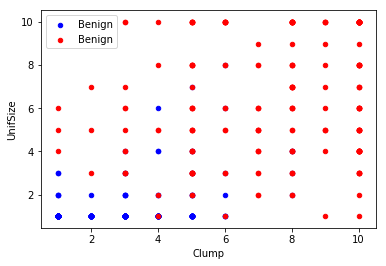

In [36]:
ben_df = cell_df[cell_df['Class']==2][0:200]
mal_df = cell_df[cell_df['Class']==4][0:200]

axes = ben_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue',label='Benign')
mal_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benign',ax=axes)


In [45]:


cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
# cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [48]:
cell_df.columns
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# independent var
x = np.asarray(feature_df)

# dependent var
y= np.asarray(cell_df['Class'])

y[0:5]


array([2, 2, 2, 2, 2])

In [53]:
#train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 4)

X_train.shape
y_train.shape
X_test.shape
y_test.shape

(137,)

In [56]:
#modeling

from sklearn import svm

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



In [57]:
#evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

